<a href="https://colab.research.google.com/github/alscop/ESAA-25-2/blob/main/YB_1114_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%ED%9A%8C%EA%B7%802.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [4]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1) 데이터 불러오기 및 데이터 선택

In [5]:
# 데이터 로드
data = pd.read_csv("/content/drive/MyDrive/EWHA/ESAA/dataset/abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

In [19]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,M,F,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,True,False,False
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,True,False,False
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,False,True,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,True,False,False
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,False,False,True


In [22]:
# 전복 고리 수
y

array([15,  7,  9, ...,  9, 10, 12])

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [14]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split


In [13]:
# train과 test set 분리 (train:test = 7:3 비율로)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [7]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [21]:
#릿지모델 생성 및 훈련
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)

#예측값 구하기
y_pred_rings = ridge.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
y_pred_ages = y_pred_rings * 1.5


#MSE와 RMSE구하기
mse = mean_squared_error(y_test + 1.5, y_pred_ages)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

18.148562613882934
4.260112981351895


3-3) 릿지 모델에서 회귀 계수 값을 구해 알 수 있는 점을 작성하시오. (각 컬럼의 정보는 data.colums 참고)

In [17]:
data.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'M', 'F', 'I'],
      dtype='object')

In [20]:
ridge.coef_

array([  1.20384237,   8.73069558,   8.0909549 ,   8.40001244,
       -19.25813151,  -8.89491392,   9.57158568,   0.35018754,
         0.26768048,  -0.61786802])

- 릿지 모델의 회귀 계수는 각 피처(길이, 직경, 높이, 무게, 성별 등 ...)가 전복의 고리 수 (y)에 미치는 영향의 크기와 방향을 나타냄. (양수/음수)
- 계수가 양수: 피처 값 증가할수록 y도 증가
- 계수가 음수: 피처 값 증가할수록 y는 감소
- 절댓값이 클수록 피처가 y에 미치는 영향이 크다고 볼 수 있음.
- 릿지 회귀 특성상 다중공선성을 완화한 상태에서 변수들의 상대적 중요도 해석이 가능함.

- 실제 변수 'Shucked weight'의 회귀계수는 매우 큰 음수. 다른 조건이 같을 때 살 무게가 큰 개체는 상대적으로 고리 수가 적을 수 있음을 시사함.


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요.

In [18]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [23]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train, y_train)
  ridge_predict = ridge.predict(X_test)
  mse = mean_squared_error(y_test, ridge_predict)
  rmse = np.sqrt(mse)
  print(alpha, rmse)

  #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
neg_mse_scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=5)
avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))

print(avg_rmse)

0 2.1911962890128427
0.1 2.1884134538322897
1 2.193974310244933
10 2.297511389880094
100 2.552404687655366
2.621188059927813


In [24]:
neg_mse_scores

array([-14.76006635,  -4.02631472,  -7.71889931,  -4.97361093,
        -5.05817693])

0.1일때 가장 성능이 좋음.

## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [25]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [26]:
#모델 생성 및 훈련
model = XGBRegressor(
    n_estimators = 100,
    learning_rate = 0.1,
    max_depth = 5,
    subsample = 0.5,
    colsample_bytree = 0.5,
    random_state = 42
)

model.fit(X_train, y_train)

#예측값 구하기
y_pred = model.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
y_test_age = y_test*1.5
y_pred_age = y_pred*1.5

#MSE와 RMSE 구하기
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(rmse)

4.727424621582031
2.1742641563485408


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

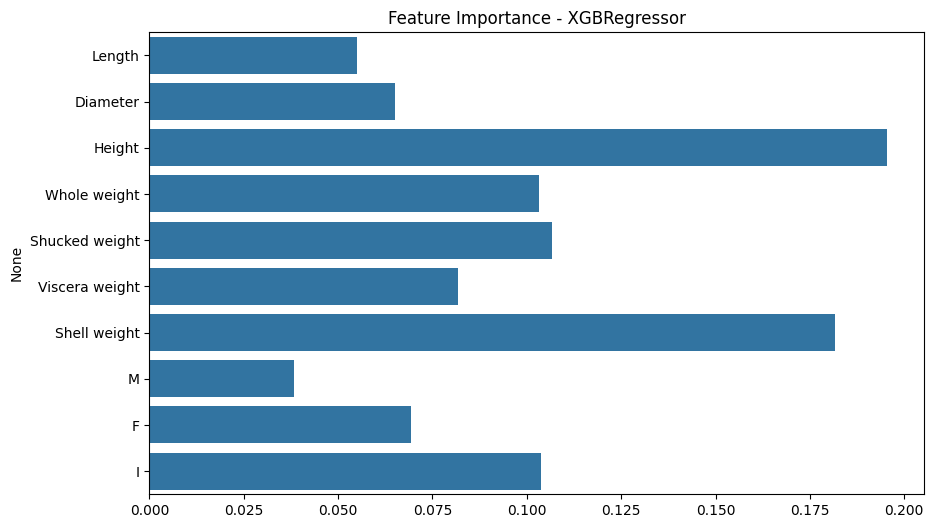

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

importance = model.feature_importances_

feature_names = data.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importance, y=feature_names)
plt.title('Feature Importance - XGBRegressor')
plt.show()



---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요.

In [8]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [28]:
wine = load_wine()

wine_x = wine.data # x변수
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [29]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

x_train.shape
y_train.shape

(124,)

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [30]:
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)

LogisticRegression()

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [31]:
#기울기
lr_clf.coef_

array([[-1.99751338e-01,  3.65451144e-01,  1.49472353e-01,
        -1.88027194e-01, -2.28494592e-02,  1.95456785e-01,
         4.66701970e-01, -1.66796877e-02,  8.23898405e-02,
         6.75013134e-02, -1.92622072e-02,  2.94916201e-01,
         7.42522347e-03],
       [ 5.96476523e-01, -7.88673910e-01, -1.26181652e-01,
         2.12254429e-01, -1.13504086e-02,  3.15786394e-01,
         3.55148523e-01,  3.34675938e-02,  2.79036084e-01,
        -1.17202662e+00,  2.61166065e-01,  4.64732238e-01,
        -8.33633769e-03],
       [-3.96725185e-01,  4.23222765e-01, -2.32907005e-02,
        -2.42272356e-02,  3.41998678e-02, -5.11243179e-01,
        -8.21850494e-01, -1.67879061e-02, -3.61425924e-01,
         1.10452531e+00, -2.41903857e-01, -7.59648438e-01,
         9.11114220e-04]])

In [32]:
#절편
lr_clf.intercept_

array([-0.04177842,  0.09551058, -0.05373216])

3-3) 모델의 정확도를 구하세요.

In [33]:
#모델의 예측값 구하기
y_pred_lr = lr_clf.predict(x_test)

#모델의 정확도 구하기
accuracy = metrics.accuracy_score(y_test, y_pred_lr)
print(accuracy)


0.9629629629629629
